In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name = ['id','clump_thickness','uniform_cell_size',
        'uniform_cell_shape','marginal_adhesion',
        'single_epithelial_size','bare_nuclei','band_chromatin',
       'normal_nucleoli','mitoses','class']
df = pd.read_csv(url,names=name)

In [3]:
#preprocessing
df.replace('?',-9999,inplace=True)
#df['bare_nuclei'] = df['bare_nuclei'].astype(np.int64)

df.drop(['id'],1,inplace=True)
print(df.axes)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'band_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [4]:
#data visualisation
print(df.dtypes)
print(df.describe())

clump_thickness            int64
uniform_cell_size          int64
uniform_cell_shape         int64
marginal_adhesion          int64
single_epithelial_size     int64
bare_nuclei               object
band_chromatin             int64
normal_nucleoli            int64
mitoses                    int64
class                      int64
dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  band_chromatin  \
co

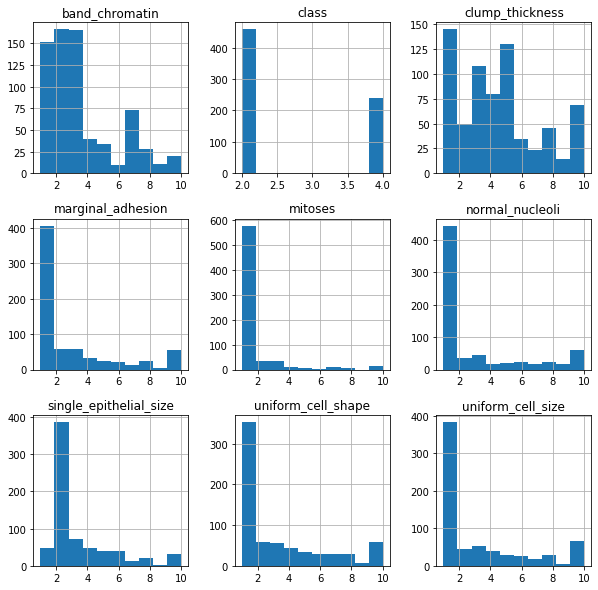

In [5]:
#histograms
df.hist(figsize=(10,10))
plt.show()

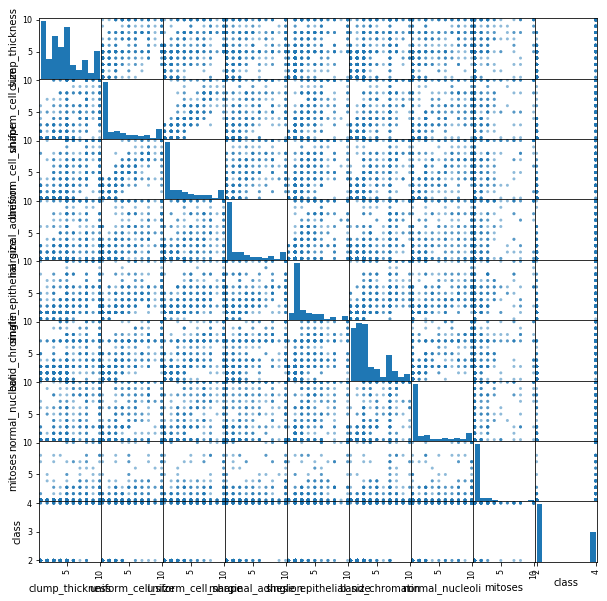

In [6]:
scatter_matrix(df,figsize=(10,10))
plt.show()

In [7]:
X = np.array(df.drop(['class'],1))
Y = np.array(df['class'])

x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=0.2)


In [8]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC(gamma='auto')))

results = []
names = []
#evaluating the model on training data
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=8)
    cv_results = model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) "%(name,cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.973182 (0.014377) 
SVM: 0.962435 (0.020277) 


In [15]:
#train model and making prediction
for name,model in models:
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9642857142857143
              precision    recall  f1-score   support

           2       0.99      0.96      0.97        90
           4       0.92      0.98      0.95        50

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140

SVM
0.95
              precision    recall  f1-score   support

           2       1.00      0.92      0.96        90
           4       0.88      1.00      0.93        50

    accuracy                           0.95       140
   macro avg       0.94      0.96      0.95       140
weighted avg       0.96      0.95      0.95       140



In [10]:
#not related to model just trying out stuff
clf = SVC(gamma='auto')
clf.fit(x_train,y_train)
example = np.array([[1,2,3,4,1,3,2,3,1]])
example = example.reshape(1,-1)
prediction = clf.predict(example)
print(prediction)

[4]
